# Proyek KASDD Ganjil 2023/24 : Valorant Pro Matches
**Nama Kelompok**: TSTKPlusSatu

| Nama                          | NPM         | Kelas |
|-------------------------------|-------------|-------|
| Kevin Alexander               | 2106705026  | B     |
| Emir Shamsuddin Fadhlurrahman | 2106632541  | F     |
| Michael Christlambert Sinanta | 2106750414  | F     |
| Vinsen Wijaya                 | 2106637776  | F     |


**Cara Menjalankan Program:**

1. Siapkan file yang dibutuhkan dalam satu folder.
```
    Folder
    │
    └─── tk-kasdad.ipynb
    │   
    └─── games.csv
    │   
    └─── matches.csv
    │   
    └─── scores.csv
    │   
    └─── agent_encode.csv
```
* Dataset dapat diakses pada [link](https://drive.google.com/drive/folders/1Fd8342inMJjF46Df7aMlo51qEvtWfl3s) ini
2. Jalankan program dengan menekan "Run All"
3. Program dapat berhasil dijalankan.

## Install Library

In [40]:
%pip install pandas numpy seaborn scipy plotly matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


##  Import Library

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt

## Data Preprocessing

In [42]:
df_games = pd.read_csv('dataset_final/games_final.csv')
df_matches = pd.read_csv('dataset_final/matches_final.csv')
df_scores = pd.read_csv('dataset_final/scores_final.csv')

In [43]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [44]:
df_winner = df_games[['GameID', 'Team1', 'Team2', 'Winner']]
df_winner

,GameID,Team1,Team2,Winner
0,60894,Booster Seat Gaming,Pho Real,1
1,60895,Booster Seat Gaming,Pho Real,2
2,60896,Booster Seat Gaming,Pho Real,1
3,60924,Bjor's Kittens,Mugiwara,1
4,60925,Bjor's Kittens,Mugiwara,1
...,...,...,...,...
11922,2297,G2 Esports,G.Gang,1
11923,2244,forZe,StartedFromCS,1
11924,2302,BBL Esports,need more DM,1
11925,2278,PartyParrots,BAG8,1


In [45]:
df_composition = df_scores[['GameID', 'TeamAbbreviation', 'Agent']]
df_composition.head(10)

,GameID,TeamAbbreviation,Agent
0,60894,Boos,jett
1,60894,Boos,chamber
2,60894,Boos,sova
3,60894,Boos,viper
4,60894,Boos,skye
5,60894,Pho,astra
6,60894,Pho,sova
7,60894,Pho,chamber
8,60894,Pho,skye
9,60894,Pho,viper


In [46]:
cek_null(df_composition)

Empty DataFrame
Columns: [Total, Percent]
Index: []


Ada missing values pada Agent. Sulit untuk memberikan nilai pada missing values tersebut, karena kita harus menjaga constraint bahwa pada setiap tim di setiap game, tidak boleh ada agent yang sama. Oleh karena itu, kita lakukan drop.

In [47]:
df_composition_dropped = df_composition.dropna()
df_composition_dropped

,GameID,TeamAbbreviation,Agent
0,60894,Boos,jett
1,60894,Boos,chamber
2,60894,Boos,sova
3,60894,Boos,viper
4,60894,Boos,skye
...,...,...,...
108245,2309,GRG,omen
108246,2309,GRG,phoenix
108247,2309,GRG,jett
108248,2309,GRG,sova


In [48]:
df_composition[df_composition['TeamAbbreviation'].isna()]

,GameID,TeamAbbreviation,Agent


In [49]:
df_merged = df_winner.merge(df_composition, left_on='GameID', right_on='GameID')
df_merged

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
108245,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,omen
108246,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,phoenix
108247,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,jett
108248,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,sova


Di bawah, terlihat bahwa terdapat data game yang jumlah pemainnya kurang dari 10 orang. Padahal dalam suatu permainan, jumlah pemain haruslah 10. Kemungkinan itu adalah data yang corrupt. Karena hanya 1.5% (199 / 12952), maka kita dapat melakukan drop.

In [50]:
df_merged.groupby('GameID').size()[df_merged.groupby('GameID').size() != 10]

Series([], dtype: int64)

In [51]:
df_merged.groupby('GameID').size()

GameID
2238     10
2241     10
2244     10
2297     10
2302     10
         ..
60904    10
60912    10
60913    10
60921    10
60922    10
Length: 10825, dtype: int64

In [52]:
games_10_players = df_merged.groupby('GameID').size()[df_merged.groupby('GameID').size() == 10].index
df_merged_games_10 = df_merged[df_merged['GameID'].isin(games_10_players)]
df_merged_games_10

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
108245,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,omen
108246,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,phoenix
108247,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,jett
108248,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,sova


In [53]:
cek_null(df_merged_games_10)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [54]:
df_agent_exist = df_merged_games_10[df_merged_games_10['Agent'].notna()]
df_agent_exist

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
108245,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,omen
108246,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,phoenix
108247,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,jett
108248,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,sova


In [55]:
df_agent_exist.groupby('GameID').size()[df_agent_exist.groupby('GameID').size() != 10]

Series([], dtype: int64)

Wait, mending yang soal match == 10 itu belakangan aja.. apus dulu yang gaada Agent, etc

In [56]:
df_agent_exist = df_merged[df_merged['Agent'].notna()]
df_agent_exist

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
108245,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,omen
108246,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,phoenix
108247,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,jett
108248,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,sova


In [57]:
cek_null(df_agent_exist)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [58]:
df_team_exist = df_agent_exist[df_agent_exist['TeamAbbreviation'].notna()]
df_team_exist

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
108245,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,omen
108246,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,phoenix
108247,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,jett
108248,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,sova


In [59]:
games_with_10_players = df_team_exist.groupby('GameID').size()[df_team_exist.groupby('GameID').size() == 10].index
df_valid_game = df_team_exist[df_team_exist['GameID'].isin(games_with_10_players)]
df_valid_game

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
108245,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,omen
108246,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,phoenix
108247,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,jett
108248,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,sova


In [60]:
cek_null(df_valid_game)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [61]:
df_valid_game

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
108245,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,omen
108246,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,phoenix
108247,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,jett
108248,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,sova


Coba pisah jadi 5-5, terus ambil yang ganjil -> set 1, genap -> set 2.

In [62]:
df_odd = df_valid_game[df_valid_game.reset_index().index % 10 < 5]
df_even = df_valid_game[df_valid_game.reset_index().index % 10 >= 5]

odd_team_name = df_odd[['Team1', 'TeamAbbreviation']].rename(columns={'Team1': 'Team'}, inplace=False)
even_team_name = df_even[['Team2', 'TeamAbbreviation']].rename(columns={'Team2': 'Team'}, inplace=False)

df_team_abbrev_pair = pd.concat([odd_team_name, even_team_name], axis=0)
df_team_abbrev_pair = df_team_abbrev_pair.groupby(['Team', 'TeamAbbreviation']).size()

df_team_abbrev_pair = pd.DataFrame(df_team_abbrev_pair).reset_index()
df_team_abbrev_pair = df_team_abbrev_pair[['Team', 'TeamAbbreviation']]
df_team_abbrev_pair

,Team,TeamAbbreviation
0,#1 Victory Royale,1VR
1,-sheesh-,-she
2,100 Thieves,100T
3,123TAP,123T
4,1337,1337
...,...,...
1787,Øutsiders,Øut
1788,İstanbul Wildcats,IW
1789,świeca,świ
1790,레.스.고,레.


In [63]:
df_team_abbrev_no_dupe = df_team_abbrev_pair[~df_team_abbrev_pair[['Team']].duplicated(keep='first')]
team_to_abbrev = dict(zip(df_team_abbrev_no_dupe['Team'], df_team_abbrev_no_dupe['TeamAbbreviation']))

In [64]:
df_team_abbrev_pair[df_team_abbrev_pair['Team'].duplicated(keep=False)]

,Team,TeamAbbreviation
40,ALCYONE,ALCY
41,ALCYONE,PlayerALCY
73,Aim from Kitchen,Aim
74,Aim from Kitchen,brimstoneAim
87,All Gamers,AG
88,All Gamers,All
173,Benchwarmers,BENCH
174,Benchwarmers,Benc
268,Cosmic Divide,CD
269,Cosmic Divide,Cosm


In [65]:
df_valid_game

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
108245,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,omen
108246,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,phoenix
108247,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,jett
108248,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,sova


In [66]:
def convert_name(row):
    row
    return row

In [67]:
owo = {
    'A': [1, 2, 3],
    'B': [5, 20, 8],
}

def row_sum(row):
    row['A'] = 10
    return row

df_owo = pd.DataFrame(owo)
df_owo.apply(row_sum, axis=1)

,A,B
0,10,5
1,10,20
2,10,8


---

In [68]:
df_valid_game = df_valid_game.reset_index().drop('index', axis=1)
df_valid_game

,GameID,Team1,Team2,Winner,TeamAbbreviation,Agent
0,60894,Booster Seat Gaming,Pho Real,1,Boos,jett
1,60894,Booster Seat Gaming,Pho Real,1,Boos,chamber
2,60894,Booster Seat Gaming,Pho Real,1,Boos,sova
3,60894,Booster Seat Gaming,Pho Real,1,Boos,viper
4,60894,Booster Seat Gaming,Pho Real,1,Boos,skye
...,...,...,...,...,...,...
108245,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,omen
108246,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,phoenix
108247,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,jett
108248,2309,ISOL-BULIL,GRANIT GAMING,1,GRG,sova


In [69]:
df_win_1 = df_valid_game[df_valid_game['Winner'] == 1]
df_win_2 = df_valid_game[df_valid_game['Winner'] == 2]

In [70]:
df_comp_1 = (df_win_1[df_win_1.reset_index().index % 10 < 5])[['GameID', 'Agent']]
df_comp_2 = (df_win_2[df_win_2.reset_index().index % 10 >= 5])[['GameID', 'Agent']]

In [71]:
df_composition = pd.concat([df_comp_1, df_comp_2], axis=0)
df_composition

,GameID,Agent
0,60894,jett
1,60894,chamber
2,60894,sova
3,60894,viper
4,60894,skye
...,...,...
108155,2535,cypher
108156,2535,raze
108157,2535,jett
108158,2535,sage


In [72]:
df_composition_sorted = df_composition.sort_values(by=['GameID', 'Agent'])
df_composition_sorted

,GameID,Agent
108204,2238,cypher
108203,2238,jett
108202,2238,omen
108201,2238,sage
108200,2238,sova
...,...,...
93,60922,jett
92,60922,reyna
94,60922,sage
90,60922,sova


In [73]:
df_win_composition = df_composition_sorted.groupby('GameID')['Agent'].agg(tuple).reset_index()
df_win_composition = df_win_composition[['Agent']]
df_win_composition

,Agent
0,"(cypher, jett, omen, sage, sova)"
1,"(cypher, jett, omen, raze, sage)"
2,"(cypher, omen, raze, sage, sova)"
3,"(cypher, jett, omen, sage, sova)"
4,"(cypher, jett, omen, raze, sage)"
...,...
10820,"(jett, reyna, sage, sova, viper)"
10821,"(jett, reyna, sage, sova, viper)"
10822,"(astra, jett, raze, skye, viper)"
10823,"(astra, jett, raze, skye, sova)"


In [74]:
df_composition_win_count = df_win_composition.groupby('Agent')['Agent'].count()
df_composition_win_count

Agent
(astra, breach, brimstone, chamber, reyna)     2
(astra, breach, brimstone, sova, viper)        1
(astra, breach, chamber, jett, sova)           1
(astra, breach, chamber, raze, viper)          2
(astra, breach, cypher, jett, kayo)            1
                                              ..
(omen, reyna, skye, sova, viper)               1
(omen, skye, sova, viper, yoru)                1
(raze, reyna, sage, sova, viper)               6
(raze, sage, skye, sova, viper)               12
(reyna, sage, skye, sova, viper)               2
Name: Agent, Length: 686, dtype: int64

In [75]:
df_composition_win_count_sorted = df_composition_win_count.sort_values(ascending=False)
df_composition_win_count_sorted

Agent
(cypher, jett, omen, raze, sova)       417
(jett, killjoy, sage, sova, viper)     397
(cypher, jett, omen, phoenix, sova)    356
(jett, reyna, sage, sova, viper)       349
(breach, cypher, jett, omen, sova)     348
                                      ... 
(breach, cypher, jett, sage, viper)      1
(breach, cypher, jett, omen, viper)      1
(cypher, omen, sage, sova, viper)        1
(cypher, omen, skye, sova, viper)        1
(breach, omen, raze, reyna, sova)        1
Name: Agent, Length: 686, dtype: int64

Jadi, composition yang paling sering memenangkan pertandingan adalah `cypher, jett, omen, raze, sova` dengan banyak pertandingan 421.

In [76]:
# type(df_composition_win_count_sorted)

df_result = pd.DataFrame(df_composition_win_count_sorted)
df_result_dict = df_result['Agent'].to_dict()

df_result = pd.DataFrame(df_result_dict.items(), columns=['Agent', 'Count'])
df_result
# df_result.reset_index()

# df_result.columns = ['Agent', 'Count']
# df_result.reset_index()   

# df_composition_win_count_sorted.rename('Agent')

# df_composition_win_count_sorted.reset_index()

# df_composition_win_count_sorted.columns = ['Agent', 'Test']

# df_composition_win_count_sorted.columns
# sns.barplot(df_composition_win_count_sorted)

,Agent,Count
0,"(cypher, jett, omen, raze, sova)",417
1,"(jett, killjoy, sage, sova, viper)",397
2,"(cypher, jett, omen, phoenix, sova)",356
3,"(jett, reyna, sage, sova, viper)",349
4,"(breach, cypher, jett, omen, sova)",348
...,...,...
681,"(breach, cypher, jett, sage, viper)",1
682,"(breach, cypher, jett, omen, viper)",1
683,"(cypher, omen, sage, sova, viper)",1
684,"(cypher, omen, skye, sova, viper)",1


In [77]:
def tuple_to_string(row):
    row['Agent'] = '\n'.join(row['Agent'])
    return row

df_result_fixed = df_result.apply(tuple_to_string, axis=1)
df_result_fixed

,Agent,Count
0,cypher\njett\nomen\nraze\nsova,417
1,jett\nkilljoy\nsage\nsova\nviper,397
2,cypher\njett\nomen\nphoenix\nsova,356
3,jett\nreyna\nsage\nsova\nviper,349
4,breach\ncypher\njett\nomen\nsova,348
...,...,...
681,breach\ncypher\njett\nsage\nviper,1
682,breach\ncypher\njett\nomen\nviper,1
683,cypher\nomen\nsage\nsova\nviper,1
684,cypher\nomen\nskye\nsova\nviper,1


C:\Users\vinse\AppData\Local\Temp\ipykernel_26276\2447778649.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Agent', y='Count', data=df_result_fixed[:10], palette='magma')


<Axes: xlabel='Agent', ylabel='Count'>

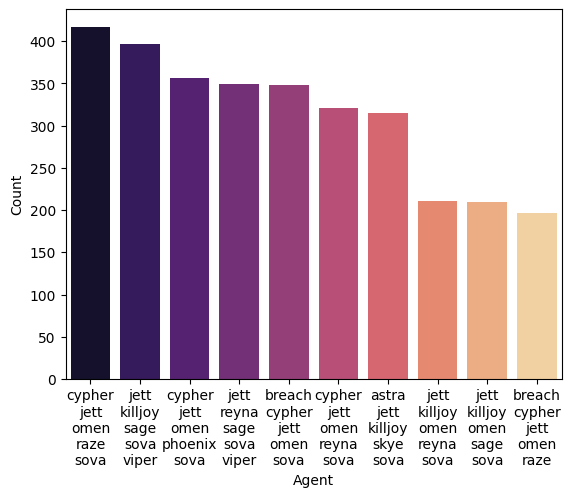

In [78]:
sns.barplot(x='Agent', y='Count', data=df_result_fixed[:10], palette='magma')